In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.special import lambertw
import sys

In [2]:
sys.path.append('..')

In [3]:
def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [4]:
def SIR_Model(t,beta,gamma,I0,R0):
  S0 = 1 - I0 - R0
  #the rest that we had before
  y0 = S0,I0,R0
  ret = odeint(deriv, y0, t, args=(beta, gamma))
  S, I, R = ret.T
  return I

## Sao Paulo

### Using linear fit + our derived formulas

In [5]:
df = pd.read_csv('../Data/analyzed/res_epi_curve_355030.csv') 

In [6]:
N = 11451245
C = np.sum(df['CASO'].to_numpy())/N

In [7]:
data = df[43:51]['CASO'].to_numpy()
data = data/N
date = np.arange(0,data.shape[0]*7,7)

In [8]:
data_log = np.log(data)
date_fit = date.reshape((-1, 1))

In [9]:
model = LinearRegression().fit(date_fit, data_log)
r_sq = model.score(date_fit, data_log)
intercept = model.intercept_
slope = model.coef_

In [10]:
gamma = 1/7
a = ((slope/gamma) + 1)
R0 = (lambertw(-a*np.exp(-a)) + a)/C
S0 = C/(1-np.exp(-R0*C))*N

In [11]:
print('R0 =',np.real(R0[0]))
print('S0 =',np.real(S0[0]))

R0 = 1007.5517065755005
S0 = 16989.20916591371


### SIR Model fit

In [12]:
p0 = 10/7,1/7,10/N,0.93
parameters, covariance = curve_fit(SIR_Model, date, data,p0)

C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [13]:
parameters

array([1.81000199e+00, 1.01566437e-01, 1.17172109e-06, 9.09058913e-01])

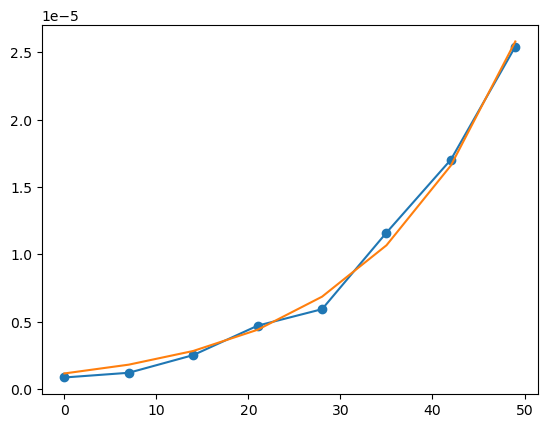

In [14]:
plt.plot(date,data,'-o')
plt.plot(date,SIR_Model(date,parameters[0],parameters[1],parameters[2],parameters[3]))

In [15]:
print('R0 =',parameters[0]/parameters[1])
print('S0_fit =', (1-parameters[2]-parameters[3])*N, 'S0_fit_frac =',(1-parameters[2]-parameters[3]))
R0 = parameters[0]/parameters[1]
print('S0_formula = ', C/(1-np.exp(-R0*C))*N, 'S0_fit_formula =',C/(1-np.exp(-R0*C)))

R0 = 17.820867125615475
S0_fit = 1041375.251255442 S0_fit_frac = 0.09093991537648893
S0_formula =  647509.6404655811 S0_fit_formula = 0.056544911969447956


## Comparing both fits

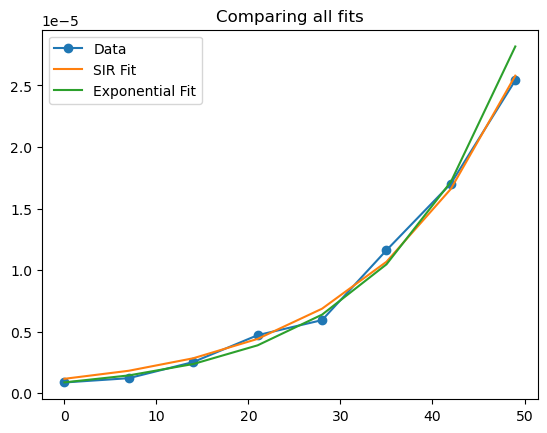

In [16]:
plt.plot(date,data,'-o', label = 'Data')
plt.plot(date,SIR_Model(date,parameters[0],parameters[1],parameters[2],parameters[3]), label = 'SIR Fit')
plt.plot(date, np.exp(date*slope + intercept), label = 'Exponential Fit')
plt.title('Comparing all fits')
plt.legend()
plt.show()

## Trying to fit the whole curve 

In [17]:
data_total = df[43:80]['CASO']/N
date_total = np.arange(0,7*data_total.shape[0],7)
p0 = 10/7,1/7,10/N,0.93
parameters, covariance = curve_fit(SIR_Model, date_total, data_total,p0)

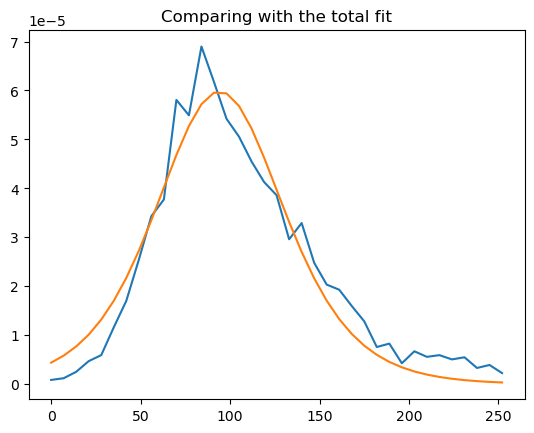

In [18]:
plt.plot(date_total,data_total)
plt.plot(date_total,SIR_Model(date_total,parameters[0],parameters[1],parameters[2],parameters[3]), label = 'SIR Fit')
plt.title('Comparing with the total fit')
plt.show()